<a href="https://colab.research.google.com/github/mirula17/Movie-Rating-Predictor/blob/main/AI_Doodle_Interpreter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("AI Doodle Interpreter – Step 1 done")



AI Doodle Interpreter – Step 1 done


In [2]:
!pip install tensorflow matplotlib numpy


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [4]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy


--2026-01-21 08:18:53--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 74.125.26.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96590448 (92M) [application/octet-stream]
Saving to: ‘cat.npy’

cat.npy             100%[===================>]  92.12M   131MB/s    in 0.7s    

2026-01-21 08:18:54 (131 MB/s) - ‘cat.npy’ saved [96590448/96590448]



In [5]:
import numpy as np

cat = np.load("cat.npy")
print("Cat data shape:", cat.shape)


Cat data shape: (123202, 784)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

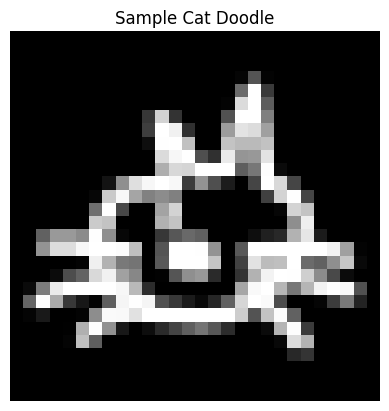

In [6]:
import matplotlib.pyplot as plt

plt.imshow(cat[0].reshape(28, 28), cmap='gray')
plt.title("Sample Cat Doodle")
plt.axis('off')


In [7]:
# Use only a small subset for efficiency
X_cat = cat[:5000] / 255.0   # normalize pixel values
y_cat = np.zeros(5000)      # label 0 for cat

print("X_cat shape:", X_cat.shape)
print("y_cat shape:", y_cat.shape)



X_cat shape: (5000, 784)
y_cat shape: (5000,)


In [8]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy


--2026-01-21 08:21:07--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 192.178.219.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143287056 (137M) [application/octet-stream]
Saving to: ‘car.npy’

car.npy             100%[===================>] 136.65M   217MB/s    in 0.6s    

2026-01-21 08:21:08 (217 MB/s) - ‘car.npy’ saved [143287056/143287056]



In [9]:
car = np.load("car.npy")

X_car = car[:5000] / 255.0   # normalize
y_car = np.ones(5000)        # label 1 for car

print("Car X shape:", X_car.shape)
print("Car y shape:", y_car.shape)


Car X shape: (5000, 784)
Car y shape: (5000,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

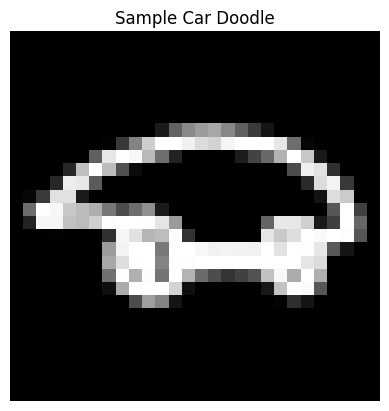

In [10]:
plt.imshow(car[1].reshape(28,28), cmap='gray')
plt.title("Sample Car Doodle")
plt.axis('off')


In [11]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/flower.npy


--2026-01-21 08:22:10--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/flower.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.217.207, 192.178.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113537392 (108M) [application/octet-stream]
Saving to: ‘flower.npy’

flower.npy          100%[===================>] 108.28M   159MB/s    in 0.7s    

2026-01-21 08:22:10 (159 MB/s) - ‘flower.npy’ saved [113537392/113537392]



In [12]:
flower = np.load("flower.npy")

X_flower = flower[:5000] / 255.0   # normalize
y_flower = np.full(5000, 2)        # label 2 for flower

print("Flower X shape:", X_flower.shape)
print("Flower y shape:", y_flower.shape)


Flower X shape: (5000, 784)
Flower y shape: (5000,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

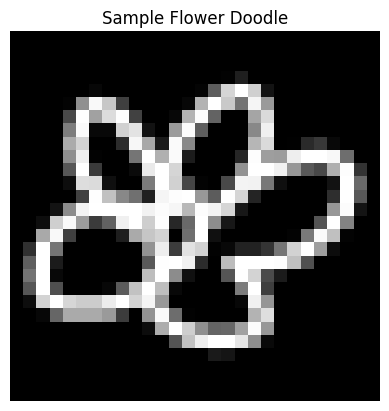

In [13]:
plt.imshow(flower[2].reshape(28,28), cmap='gray')
plt.title("Sample Flower Doodle")
plt.axis('off')



In [14]:
# Combine all data
X = np.concatenate([X_cat, X_car, X_flower])
y = np.concatenate([y_cat, y_car, y_flower])

print("Combined X shape:", X.shape)
print("Combined y shape:", y.shape)


Combined X shape: (15000, 784)
Combined y shape: (15000,)


In [16]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [18]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,931 (425.51 KB)

 Trainable params: 108,931 (425.51 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
history = model.fit(
    X, y,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8711 - loss: 0.3559 - val_accuracy: 0.9290 - val_loss: 0.2143
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9349 - loss: 0.1862 - val_accuracy: 0.9273 - val_loss: 0.2180
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9480 - loss: 0.1521 - val_accuracy: 0.9340 - val_loss: 0.1801
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9613 - loss: 0.1098 - val_accuracy: 0.9417 - val_loss: 0.1675
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9723 - loss: 0.0823 - val_accuracy: 0.9453 - val_loss: 0.1672
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9837 - loss: 0.0538 - val_accuracy: 0.9403 - val_loss: 0.1756
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9883 - loss: 0.0392 - val_accuracy: 0.9360 - val_loss: 0.2045
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0284 - val_accuracy: 0.

In [23]:
model.save("doodle_model.h5")
print("Model saved successfully")


Model saved successfully


In [24]:
import os
os.listdir()


['.config',
 'car.npy',
 'flower.npy',
 'doodle_model.h5',
 'cat.npy',
 'sample_data']